### Importing libraries
Importing Libraries required for Project such **pandas**,**numpy**,**matplotlib**,**seaborn** and using
"**%matplotlib inline command**" - a magic command that allows the output of plotting commands to be displayed directly below the code cell that produced it

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset
I have [**IPL 2022 Dataset**](https://www.kaggle.com/datasets/aravindas01/ipl-2022dataset/data) from Kaggle in CSV format. The dataset was loaded into a DataFrame using the Pandas `read_csv()` function.

In [66]:
df=pd.read_csv('/kaggle/input/ipl-2022dataset/Book_ipl22_ver_33.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Column Overview (df.columns)
Here, I listed all the column names present in the DataFrame using the `columns` attribute.

In [67]:
df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

### Dataset Information (df.info())
Here, I displayed a summary of the DataFrame, including data types, non-null counts, and memory usage using `df.info` method

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

### Summary Statistics (df.describe())
Here,I generated summary statistics for the numeric columns in the DataFrame using the `describe()` method.

In [69]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [70]:
for entries in df.columns:
    if df[entries].isnull().sum() > 0:
        print(f"Column '{entries}' has {df[entries].isnull().sum()} missing values.")

# General Overview:

### Setting Up Palette and Team Data
Creating a dictionary to represent team colors (`ipl_teams_colors`), generating a list of custom colors (`c`), and obtaining a sorted list of unique team names by stacking and sorting columns 'team2' and 'team1' in the DataFrame `df`.

In [71]:
ipl_teams_colors = {
    "Chennai": "#FFC300",  # Yellow
    "Delhi": "#0070C0",  # Sky Blue
    "Gujarat": "#12A4D9",  # Teal
    "Kolkata": "#5D23A2",  # Purple
    "Lucknow": "#1AB7EA",  # Turquoise
    "Mumbai": "#001B43",  # Navy Blue
    "Punjab": "#DA2C2C",  # Red
    "Rajasthan": "#FFC0CB",  # Pink
    "Banglore": "#9D0000",  # Red
    "Hyderabad": "#F1804F",  # Orange
}

c=["#b33dc6",  "#27aeef", "#87bc45", "#bdcf32", "#ede15b", "#edbf33"]
teams = sorted(df[['team2','team1']].stack().unique())

### Total number of matches played in IPL 2022?

In [72]:
print(f"Total Number of matched played is {df['match_id'].max()}")

Total Number of matched played is 74


### List of Venues where matches was played

In [73]:
for entries in sorted(df['venue'].unique()):
    print(f"{entries}")

Brabourne Stadium, Mumbai
Dr DY Patil Sports Academy, Mumbai
Eden Gardens, Kolkata
Maharashtra Cricket Association Stadium,Pune
Narendra Modi Stadium, Ahmedabad
Wankhede Stadium, Mumbai


### List of Team Played in IPL 2022

In [74]:
for entries in sorted(df[['team2','team1']].stack().unique()):
    print(f"{entries}")

Banglore
Chennai
Delhi
Gujarat
Hyderabad
Kolkata
Lucknow
Mumbai
Punjab
Rajasthan


### Analysis: Number of Matches Played in Each Venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

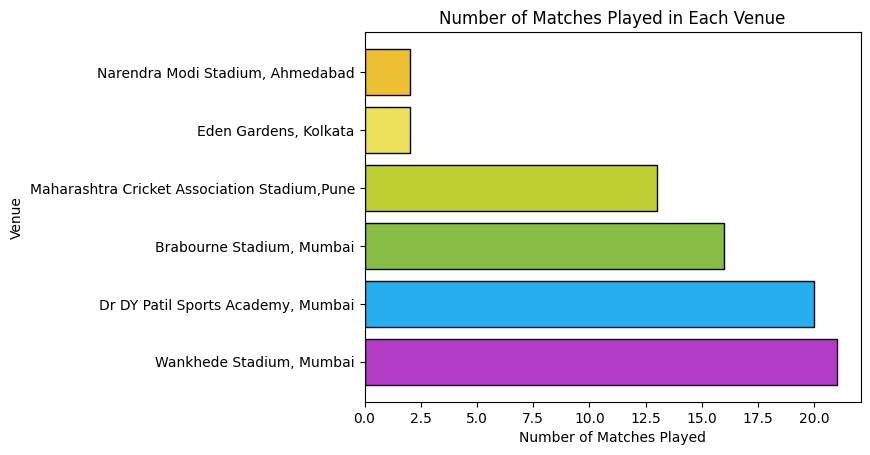

In [75]:
matchsplayed=df['venue'].value_counts()


plt.barh(matchsplayed.index, matchsplayed.values,color=c,edgecolor='black')

plt.ylabel('Venue')
plt.xlabel('Number of Matches Played')
plt.title('Number of Matches Played in Each Venue')
matchsplayed

### Analysis: Number of Matches Played By Each Team

Banglore     16
Chennai      14
Delhi        14
Gujarat      16
Hyderabad    14
Kolkata      14
Lucknow      15
Mumbai       14
Punjab       14
Rajasthan    17
Name: count, dtype: int64

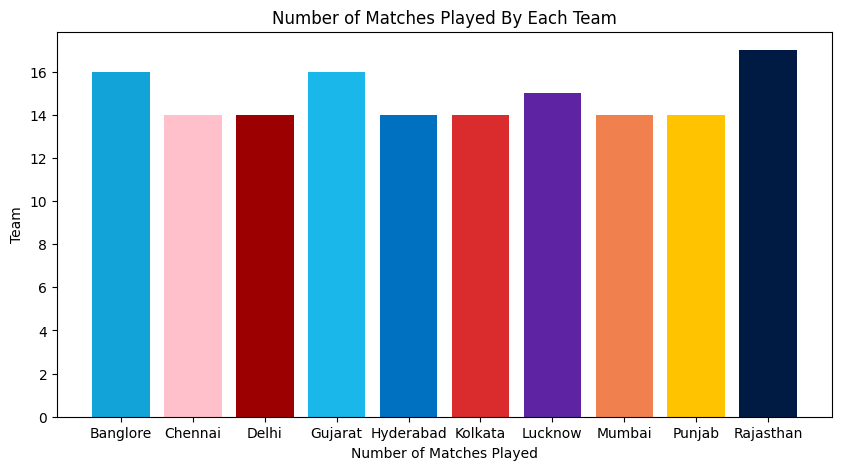

In [76]:
df['match_lost'] = df.apply(lambda row: row['team2'] if row['team1'] == row['match_winner'] else row['team1'], axis=1)
matchswon=df['match_winner'].value_counts()
matchslost=df['match_lost'].value_counts()
plt.figure(figsize=(10, 5))
TotalMatchPlayed=matchswon+matchslost
colors=[ipl_teams_colors[team] for team in matchswon.index]
plt.bar( TotalMatchPlayed.index,TotalMatchPlayed.values,color=colors)
plt.ylabel('Team')
plt.xlabel('Number of Matches Played')
plt.title('Number of Matches Played By Each Team')
TotalMatchPlayed

# Toss Analysis

### Decision Trends After Toss Win: Fielding vs. Batting Percentage

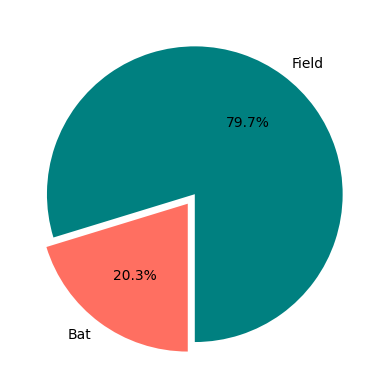

In [77]:
tossdecision=df['toss_decision'].value_counts()
explode=[0,0.08]
color=["#008080","#ff6f61"]
plt.pie(tossdecision.values,labels=tossdecision.index,startangle=270,autopct='%1.1f%%',explode=explode,colors=color)
plt.show()

### Analysis: Toss Won by Each Team

,count
toss_winner,
Gujarat,10
Hyderabad,10
Mumbai,9
Kolkata,8
Delhi,8
Banglore,8
Lucknow,7
Chennai,6
Punjab,4


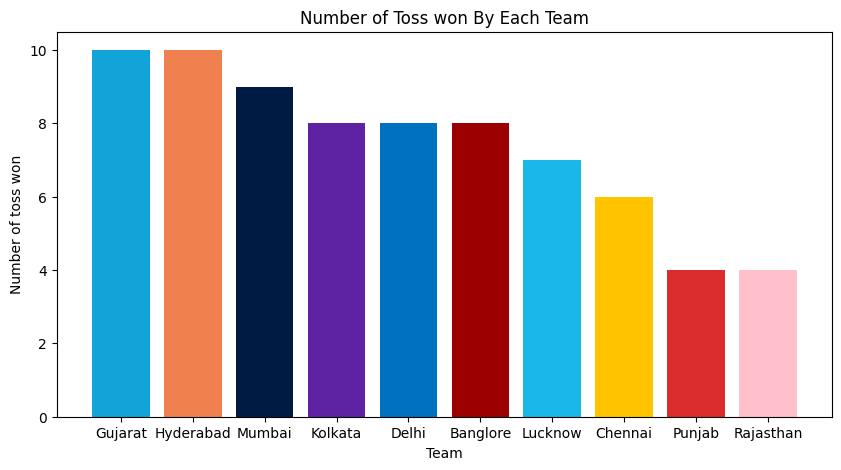

In [78]:
ipl_df=df.copy()
tosswoncount=ipl_df['toss_winner'].value_counts()
colors=[ipl_teams_colors[team] for team in tosswoncount.index]
plt.figure(figsize=(10, 5))
plt.bar( tosswoncount.index,tosswoncount.values,color=colors)
plt.xlabel('Team')
plt.ylabel('Number of toss won')
plt.title('Number of Toss won By Each Team')

display(tosswoncount.to_frame())

### Analysis: Tosses vs Matches in IPL Teams

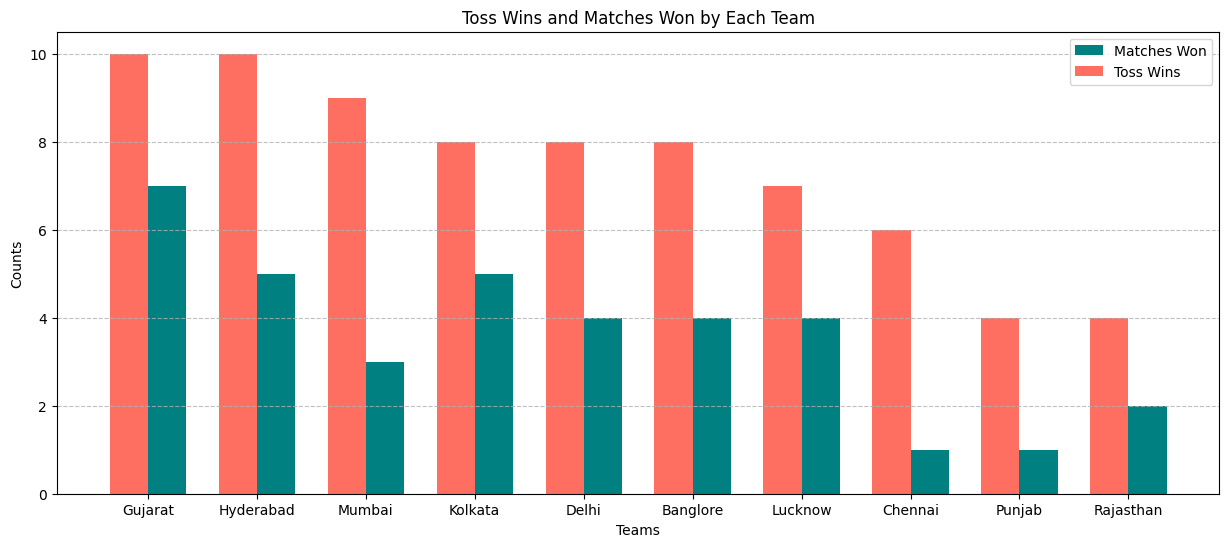

In [79]:
ipltoss_df=df[['venue','toss_winner','match_winner']].copy()

ipltoss_df['Toss_and_winner_count']=(ipl_df['toss_winner']==ipl_df['match_winner']).astype(int)
tossandmatchwon=ipltoss_df[ipltoss_df['Toss_and_winner_count'] == 1]
tossandmatchwoncount=tossandmatchwon['toss_winner'].value_counts()
tossandmatchwoncount.to_frame()
merged_df = pd.merge(tosswoncount, tossandmatchwoncount, on='toss_winner')
merged_df = merged_df.merge(matchswon.to_frame(), left_index=True, right_index=True)
merged_df.rename(columns={'count_x':'Total_Toss_won','count_y':'Total_Toss_and_Match_Won', \
                          'count':'Total_Match_won'}, inplace=True)
merged_df['Total_Toss_and_Match_lost']=merged_df['Total_Toss_won']-merged_df['Total_Toss_and_Match_Won']

merged_df

plt.figure(figsize=(15, 6))
bar_width = 0.35


indices = np.arange(len(merged_df))


plt.bar(indices + bar_width/2, merged_df['Total_Toss_and_Match_Won'].astype(float), bar_width, color='#008080', label='Matches Won')
plt.bar(indices - bar_width/2, merged_df['Total_Toss_won'].astype(float), bar_width, color='#ff6f61', label='Toss Wins')


plt.xlabel('Teams')
plt.ylabel('Counts')
plt.title('Toss Wins and Matches Won by Each Team')


plt.xticks(indices, merged_df.index)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.legend()



plt.show()

### Analysis: Toss Decision Count for Each Team

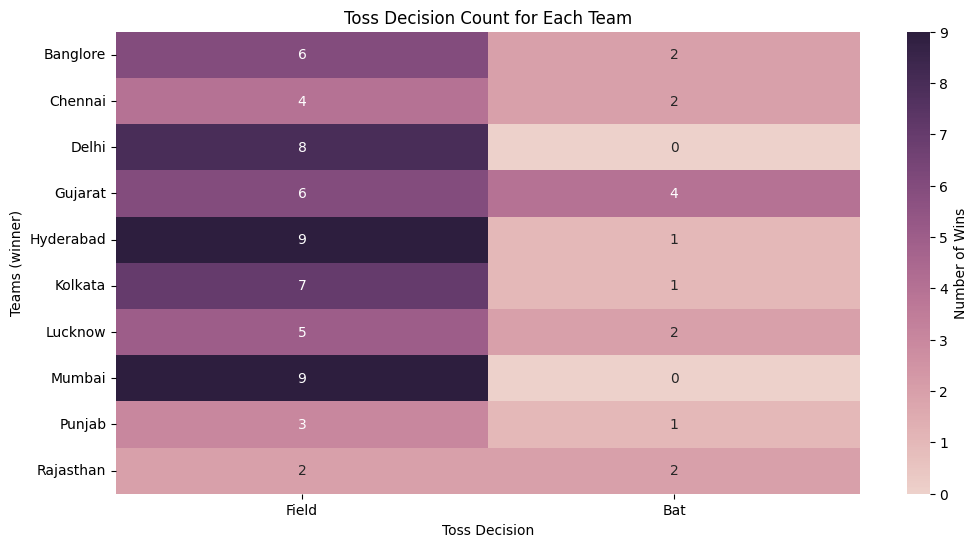

In [80]:
toss_fields_dfs = {}
toss_bats_dfs = {}

for team in teams:
    toss_fields_df = df[(df['toss_winner'] == team) & (df['toss_decision']== 'Field')]
    toss_fields_dfs[team] = toss_fields_df
    
for team in teams:
    toss_bats_df = df[(df['toss_winner'] == team) & (df['toss_decision']== 'Bat')]
    toss_bats_dfs[team] = toss_bats_df

count_Field_Bat = pd.DataFrame(index=['Field','Bat'],columns=teams)


for team in teams:
   
    count_Field_Bat.loc['Field', team] = toss_fields_dfs[team]['toss_decision'].value_counts().get('Field', 0)
    count_Field_Bat.loc['Bat', team]= toss_bats_dfs[team]['toss_decision'].value_counts().get('Bat', 0)

count_Field_Bat = count_Field_Bat.fillna(0)


count_Field_Bat = count_Field_Bat.astype(int)

count_Field_Bat = count_Field_Bat.transpose()
count_Field_Bat

plt.figure(figsize=(12, 6))
heatmap=sns.heatmap(count_Field_Bat,annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt="d" , cbar_kws={'label': 'Number of Wins'})


plt.xlabel("Toss Decision")
plt.ylabel("Teams (winner)")
plt.title("Toss Decision Count for Each Team")


plt.show()

### Analysis: Percentage of Matches Won After Winning the Toss

Gujarat      70.000000
Hyderabad    50.000000
Mumbai       33.333333
Kolkata      62.500000
Delhi        50.000000
Banglore     50.000000
Lucknow      57.142857
Chennai      16.666667
Punjab       25.000000
Rajasthan    50.000000
Name: w/t, dtype: float64

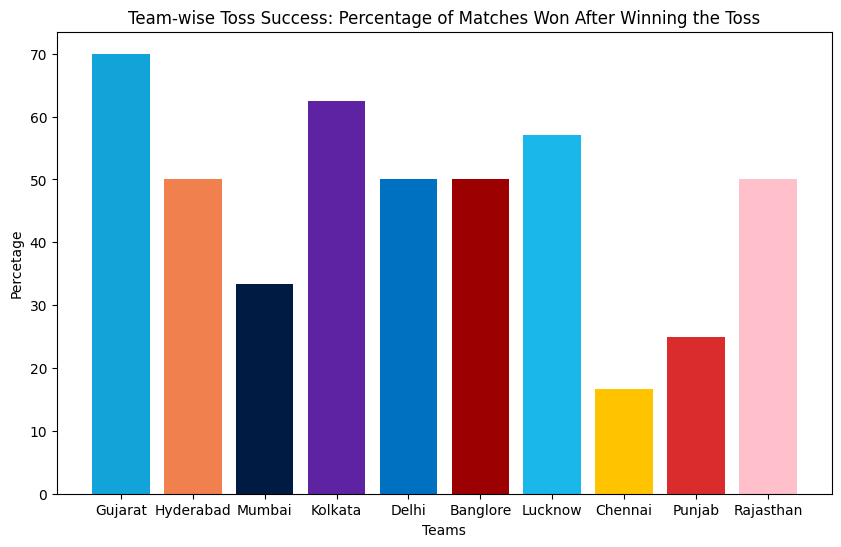

In [81]:
merged_df['w/t'] = merged_df.apply(lambda row: (row['Total_Toss_and_Match_Won']/row['Total_Toss_won'])*100 , axis=1)
merged_df

plt.figure(figsize=(10, 6))
plt.bar(merged_df.index,merged_df['w/t'],color=colors)
plt.xlabel('Teams')
plt.ylabel('Percetage')
plt.title('Team-wise Toss Success: Percentage of Matches Won After Winning the Toss')
merged_df['w/t']

### Analysis: Matches Won by Teams Winning the Toss at Each Stadium

,count
venue,
"Wankhede Stadium, Mumbai",11
"Dr DY Patil Sports Academy, Mumbai",11
"Brabourne Stadium, Mumbai",7
"Maharashtra Cricket Association Stadium,Pune",5
"Eden Gardens, Kolkata",1
"Narendra Modi Stadium, Ahmedabad",1


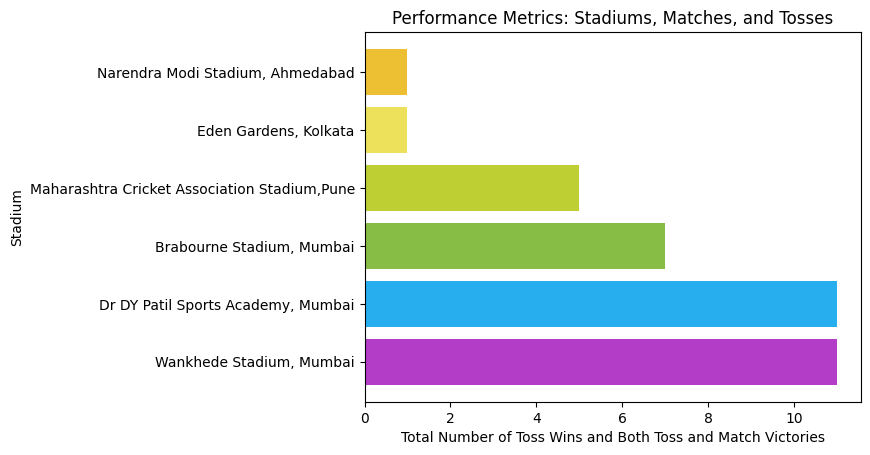

In [82]:
iplvenue_df=df[['venue','toss_winner','match_winner']].copy()
iplvenue_df['Toss_and_winner_count']=(ipl_df['toss_winner']==ipl_df['match_winner']).astype(int)
venue_tossandmatchwon=iplvenue_df[iplvenue_df['Toss_and_winner_count'] == 1]
venue_tossandmatchwon=venue_tossandmatchwon['venue'].value_counts()


plt.barh( venue_tossandmatchwon.index,venue_tossandmatchwon.values,color=c)
plt.ylabel('Stadium')
plt.xlabel('Total Number of Toss Wins and Both Toss and Match Victories')
plt.title('Performance Metrics: Stadiums, Matches, and Tosses')
venue_tossandmatchwon.to_frame()

## Innings Analysis:

### Average Score in First Innings

In [83]:
Average_score_of_First_Inning=df['first_ings_score'].mean()
print(f"Average score in the first innings is {Average_score_of_First_Inning:.2f}")

Average score in the first innings is 171.12


### Average Score in Second Innings

In [84]:
Average_score_of_Second_Inning=df['second_ings_score'].mean()
print(f"Average score in the second innings is {Average_score_of_Second_Inning:.2f}")

Average score in the second innings is 158.54


### Average Wickets in First Innings

In [85]:
Average_wkts_of_first_Inning=df['first_ings_wkts'].mean()
print(f"Average wicket in the first innings is {Average_wkts_of_first_Inning:.2f}")

Average wicket in the first innings is 6.14


### Average Wickets in Second Innings

In [86]:
Average_wkts_of_Second_Inning=df['second_ings_wkts'].mean()
print(f"Average wicket in the second innings is {Average_wkts_of_Second_Inning:.2f}")

Average wicket in the second innings is 6.18


### Wicket Frequency Overview Of First Innings

,Wickets,Frequency
0,6,18
1,5,11
2,8,9
3,7,8
4,4,7
5,10,6
6,9,6
7,3,5
8,2,3
9,0,1


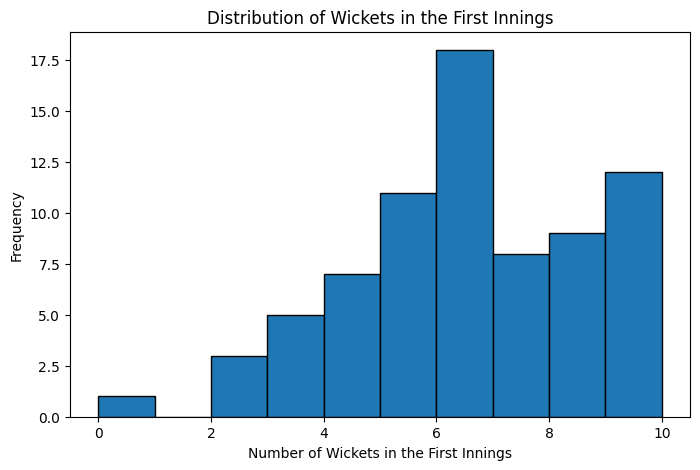

In [87]:
first_ings_wkts = df['first_ings_wkts']

plt.figure(figsize=(8, 5))
plt.hist(first_ings_wkts, bins=10, edgecolor='black')
plt.xlabel('Number of Wickets in the First Innings')
plt.ylabel('Frequency')
plt.title('Distribution of Wickets in the First Innings')


count_of_wkts_in_1st_innings = df['first_ings_wkts'].value_counts()
count_of_wkts_in_1st_innings = count_of_wkts_in_1st_innings.to_frame().reset_index()
count_of_wkts_in_1st_innings.columns = ['Wickets', 'Frequency']
count_of_wkts_in_1st_innings

### Wicket Frequency Overview Of Second Innings

,Wickets,Frequency
0,8,12
1,5,10
2,10,9
3,9,8
4,3,8
5,4,7
6,7,7
7,6,6
8,2,5
9,1,2


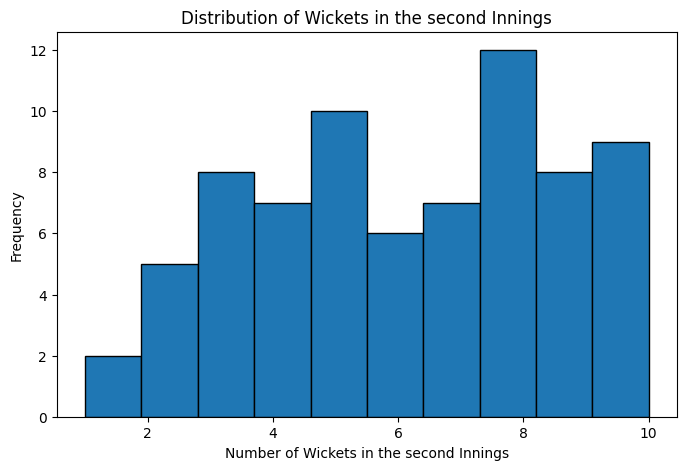

In [88]:
second_ings_wkts= df['second_ings_wkts']
plt.figure(figsize=(8, 5))
plt.hist(second_ings_wkts, bins=10, edgecolor='black')
plt.xlabel('Number of Wickets in the second Innings')
plt.ylabel('Frequency')
plt.title('Distribution of Wickets in the second Innings')

count_of_wkts_in_2nd_innings = df['second_ings_wkts'].value_counts()
count_of_wkts_in_2nd_innings = count_of_wkts_in_2nd_innings.to_frame().reset_index()
count_of_wkts_in_2nd_innings.columns = ['Wickets', 'Frequency']
count_of_wkts_in_2nd_innings

### Analysis:  Top 10 Players Winning Player of the Match

player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

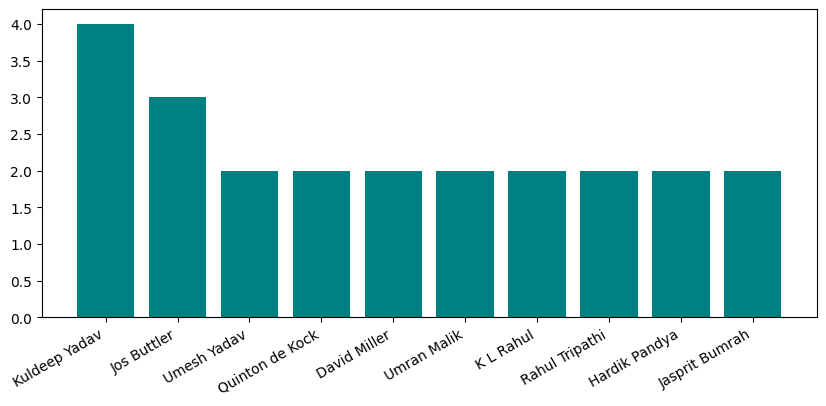

In [89]:
Playerofmatch=df['player_of_the_match'].value_counts()
Playerofmatch=Playerofmatch.head(10)
plt.figure(figsize=(10,4))
plt.bar(Playerofmatch.index,Playerofmatch.values,color='teal')
plt.xticks(rotation=30, ha='right')
Playerofmatch

### Top Scorer Across the Tournament

In [90]:
max_score_row = df.loc[df['highscore'].idxmax()]
max_score_row

print(f"Highest Score was Scored by {max_score_row['top_scorer']}. {max_score_row['top_scorer']} \
scored {max_score_row['highscore']} ")

Highest Score was Scored by Quinton de Kock. Quinton de Kock scored 140 


### Analysis: Top 10 Bowlers with the Most Impact in IPL 2022

best_bowling
Yuzvendra Chahal    5
Rashid Khan         4
T Natarajan         3
Kagiso Rabada       3
Jasprit Bumrah      3
Kuldeep Yadav       3
Avesh Khan          3
Josh Hazlewood      3
Dwayne Bravo        2
Mohsin Khan         2
Name: count, dtype: int64

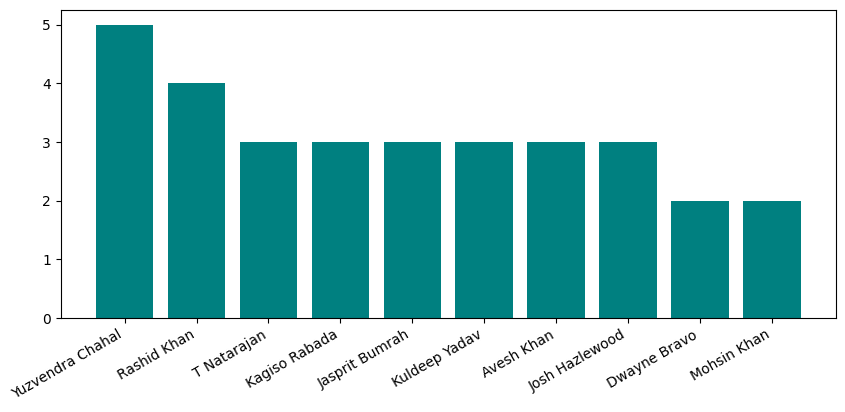

In [91]:
best_bowling_figure=df['best_bowling'].value_counts()
best_bowling_figure=best_bowling_figure.head(10)
plt.figure(figsize=(10,4))
plt.bar(best_bowling_figure.index,best_bowling_figure.values,color='teal')
plt.xticks(rotation=30, ha='right')
best_bowling_figure

### Analysis: Run-Based Wins vs. Wicket-Based Wins

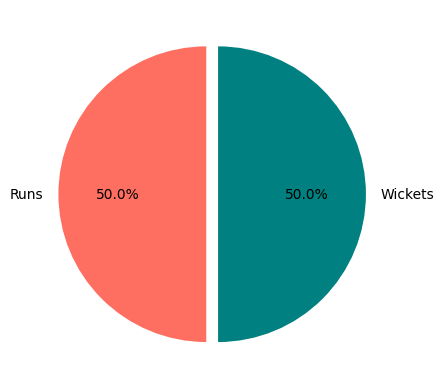

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

In [92]:
wonby=df['won_by'].value_counts()
explode=[0,0.08]
color=["#008080","#ff6f61"]
plt.pie(wonby.values,labels=wonby.index,startangle=270,autopct='%1.1f%%',explode=explode,colors=color)
plt.show()
wonby

### Average Run and Wicket Margin of IPL 2022 Winning Teams

In [93]:
wondf=df.copy()
won_by_run = wondf[wondf['won_by'] == 'Runs']
won_by_wkts = wondf[wondf['won_by'] == 'Wickets']

avgrunmargin=won_by_run['margin'].mean()
avgwktmargin=won_by_wkts['margin'].mean()

print(f"The average margin of runs with which matches were won is {avgrunmargin:.2f}")
print(f"The average margin of wickets with which matches were won is {avgwktmargin}.")

The average margin of runs with which matches were won is 27.95
The average margin of wickets with which matches were won is 6.0.


### Visualizing Team Wins and Losses with a Heatmap

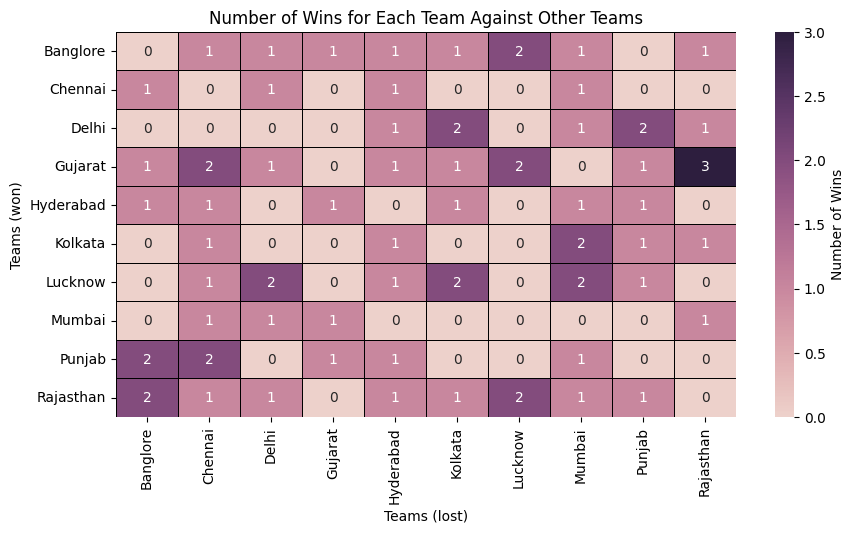

In [94]:
team_won_dfs = {}
team_lost_dfs = {}

for team in teams:
    team_won_df = df[df['match_winner'] == team]
    team_won_dfs[team] = team_won_df
    
for team in teams:
    team_lost_df = df[df['match_lost'] == team]
    team_lost_dfs[team] = team_lost_df

count_against_whom_lost = pd.DataFrame(index=teams, columns=teams)


for team_lost in teams:
   
    count_against_whom_lost[team_lost] = team_lost_dfs[team_lost]['match_winner'].value_counts()


count_against_whom_lost = count_against_whom_lost.fillna(0)


count_against_whom_lost = count_against_whom_lost.astype(int)



plt.figure(figsize=(10, 5))
sns.heatmap(count_against_whom_lost,annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt="d" , linewidths=.4, linecolor='black', cbar_kws={'label': 'Number of Wins'})


plt.xlabel("Teams (lost)")
plt.ylabel("Teams (won)")
plt.title("Number of Wins for Each Team Against Other Teams")


plt.show()

# Final Analysis

## General Analysis:

### 1.  The total number of matches played in IPL 2022 is **74**.
### 2.  The total number of venues, i.e., stadiums where matches were played, is **6**.
### 3.  The total number of teams that played in IPL 2022 is **10**.
### 4.  Wankhede Stadium in Mumbai emerged as the primary venue for IPL 2022, hosting the highest number of matches, with a total of 21   games played.   [Analysis Here](#Analysis:-Number-of-Matches-Played-in-Each-Venue)
### 5.  The venues with the lowest number of matches played in IPL 2022 were Eden Gardens in Kolkata and Narendra Modi Stadium in Ahmedabad, each hosting only 2 matches. [Analysis Here](#Analysis:-Number-of-Matches-Played-in-Each-Venue)
### 5.  In IPL 2022, the Rajasthan Royals took the field for the highest number of matches, playing a total of 17 games. [Analysis Here](#Analysis:-Number-of-Matches-Played-By-Each-Team)

## Toss Analysis

### 1. Approximately 79.7% of teams opted to field first after winning the toss. [Analysis Here](#Decision-Trends-After-Toss-Win:-Fielding-vs.-Batting-Percentage)
### 2. Gujarat Titans (GT) and Sunrisers Hyderabad (SRH) won the most tosses, each securing the coin toss 10 times.  [Analysis Here](#Analysis:-Toss-Won-by-Each-Team)
### 3.Rajasthan Royals (RR) secured the fewest toss victories, winning only 4 tosses during the IPL. [Analysis Here](#Analysis:-Toss-Won-by-Each-Team)
### 4.Mumbai Indians chose to field after winning the toss in all 9 instances, while Delhi Capitals (DC) made the same decision in 8 out of 8 toss wins. [Analysis Here](#Analysis:-Toss-Decision-Count-for-Each-Team)
### 5.Gujarat Titans maintained a close field-to-bat ratio of 6:4, choosing to field in 6 out of 10 toss wins. Notably, they stand out as the team opting to bat most frequently among those that generally choose to bat, doing so in the majority of their opportunities, a remarkable distinction considering most teams tend to bat only 1-2 times. [Analysis Here](#Analysis:-Toss-Decision-Count-for-Each-Team)
### 6.Gujarat Titans boast the highest success rate among all 10 teams when it comes to matches won after securing the toss, with an impressive 70 percent victory rate. [Analysis Here](#Analysis:-Percentage-of-Matches-Won-After-Winning-the-Toss)
### 7.Chennai Super Kings have recorded the lowest success rate among all 10 teams when winning the toss, securing victory in only 17 percent of the matches. [Analysis Here](#Analysis:-Percentage-of-Matches-Won-After-Winning-the-Toss)
### 8.Wankhede Stadium, Mumbai, and Dr DY Patil Sports Academy, Mumbai, witnessed teams securing victories after winning the toss, with each venue hosting 11 such instances. [Analysis Here](#Analysis:-Matches-Won-by-Teams-Winning-the-Toss-at-Each-Stadium)

## Innings Analysis

### 1.The average score in the first innings is 171.12, while in the second innings, it is 158.54
### 2.The average number of wickets in the first innings is 6.14, and in the second innings, it is 6.18
### 3.Across all matches, the maximum number of wickets taken in a single first innings was 6, while in the second innings, the highest number reached 8. [Analysis Here](#Wicket-Frequency-Overview-Of-First-Innings)
### 4.The average winning margin in terms of runs is 27.95, and in terms of wickets, it is 6.0.[Analysis Here](#Average-Run-and-Wicket-Margin-of-IPL-2022-Winning-Teams)

## Other Important Analysis

### 1.Kuldeep Yadav emerged as the player of the match most frequently in IPL 2022, securing the title four times.
### 2.Quinton de Kock holds the record for the highest score in IPL 2022, achieving an impressive 140.
### 3.Yuzvendra Chahal holds the title of the Best Bowler of the Match the most number of times, achieving this distinction five times.
### 4.In IPL 2022, the victories were evenly distributed between run-based and wicket-based outcomes, each contributing to 50% of the total wins.
### 5.Among all the matches held between the two teams, Gujarat Titans secured victory over Rajasthan Royals three times, marking the highest number of wins by a single team against another in IPL 2022.